Computing the Area of the Mandelbrot Set

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import qmc

In [18]:
a0 = -0.20
a = a0
b0 = 0.25
b = b0

Lx_blue, Ly_blue = [], []

print(f"z0 = {a} + {b} i")

for i in range(1,10):
    a_temporary = a
    a = (a**2 - b**2) + a0
    b = (2 * a_temporary * b) + b0
    print(f"z{i} = {a} + {b} i")

z0 = -0.2 + 0.25 i
z1 = -0.2225 + 0.15 i
z2 = -0.17299375 + 0.18325 i
z3 = -0.2036537249609375 + 0.18659779062499998 i
z4 = -0.19334389577566616 + 0.1739973297394753 i
z5 = -0.19289320872275603 + 0.18271735682721335 i
z6 = -0.1961778425145625 + 0.1795101255045161 i
z7 = -0.19373813926497865 + 0.1795681817380114 i
z8 = -0.19471026528683924 + 0.1804215891977643 i
z9 = -0.19463986244057552 + 0.17974012900766037 i


In [19]:
def converges(a0, b0):
    a = a0
    b = b0

    for i in range(100):
        a_temporary = a
        a = (a**2 - b**2) + a0
        b = (2 * a_temporary * b) + b0

        if abs(a) > 100 and abs(b) > 100:
            return False
        
    return True

In [20]:
def mandelbrot(list1):
    Lx_blue, Ly_blue = [], []

    for item in list1:
        a0 = item[0]
        b0 = item[1]

        con = converges(a0, b0)

        if con == True:
            Lx_blue.append(a0)
            Ly_blue.append(b0)

    return Lx_blue, Ly_blue

In [21]:
def pure_random(n):
    return [[random.random()*3-2, random.random()*3-1.5] for x in range(n)]

In [30]:
def latin_hypercube(n):
    LHC_object = qmc.LatinHypercube(2)
    LHC = LHC_object.random(n)

    for j in range(len(LHC)):
        LHC[j, 0] = LHC[j, 0] * 3 - 2
        LHC[j, 1] = LHC[j, 1] * 3 - 1.5

    return LHC

In [23]:
def plot(Lx, Ly):

    plt.plot(Lx, Ly, "bo", markersize = 1)
    plt.show()

In [24]:
def area(func, n):
    """
    Calculates the area of the mandelbrot set based on n coordinate pairs, created using func.

    func: the function used to create the coordinate pairs, either 'pure_random', 'latin_hypercube', or 'orthogonal_sampling'
    """

    L_coordinates = func(n)

    Lx, Ly = mandelbrot(L_coordinates)

    area = len(Lx) / n * 9
    
    return area

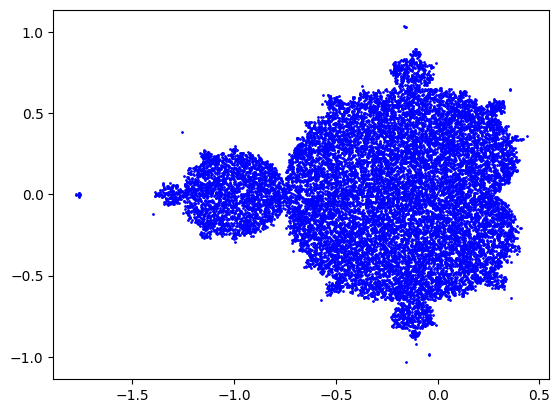

In [32]:
list1 = latin_hypercube(100000)

Lx, Ly = mandelbrot(list1)

plot(Lx, Ly)